In [10]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

def my_plot_tree(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_tree
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_tree(booster=booster, ax=ax, **kwargs)

data = np.loadtxt('./data/jet4np.csv', delimiter=',', dtype=np.float32)

tr_size = int(data.shape[0] * 0.6)

dtrain = xgb.DMatrix(data =data[:tr_size, 1:],
                     label= data[:tr_size,0])
dtest =  xgb.DMatrix(data =data[tr_size:, 1:],
                     label= data[tr_size:,0])

param = {'max_depth':5,
         'gamma':0.1,
         'eta':0.05,
         'silent':0,
         'objective':'binary:logistic' }

watchlist  = [(dtest,'eval'),
              (dtrain,'train')]

num_round = 1

In [11]:
bst = xgb.train(param, dtrain, num_round, watchlist)

[0]	eval-error:0.283734	train-error:0.28131


In [12]:
bst.feature_names = ['nmult', 'cmult', 'axis1', 'axis2', 'ptD']

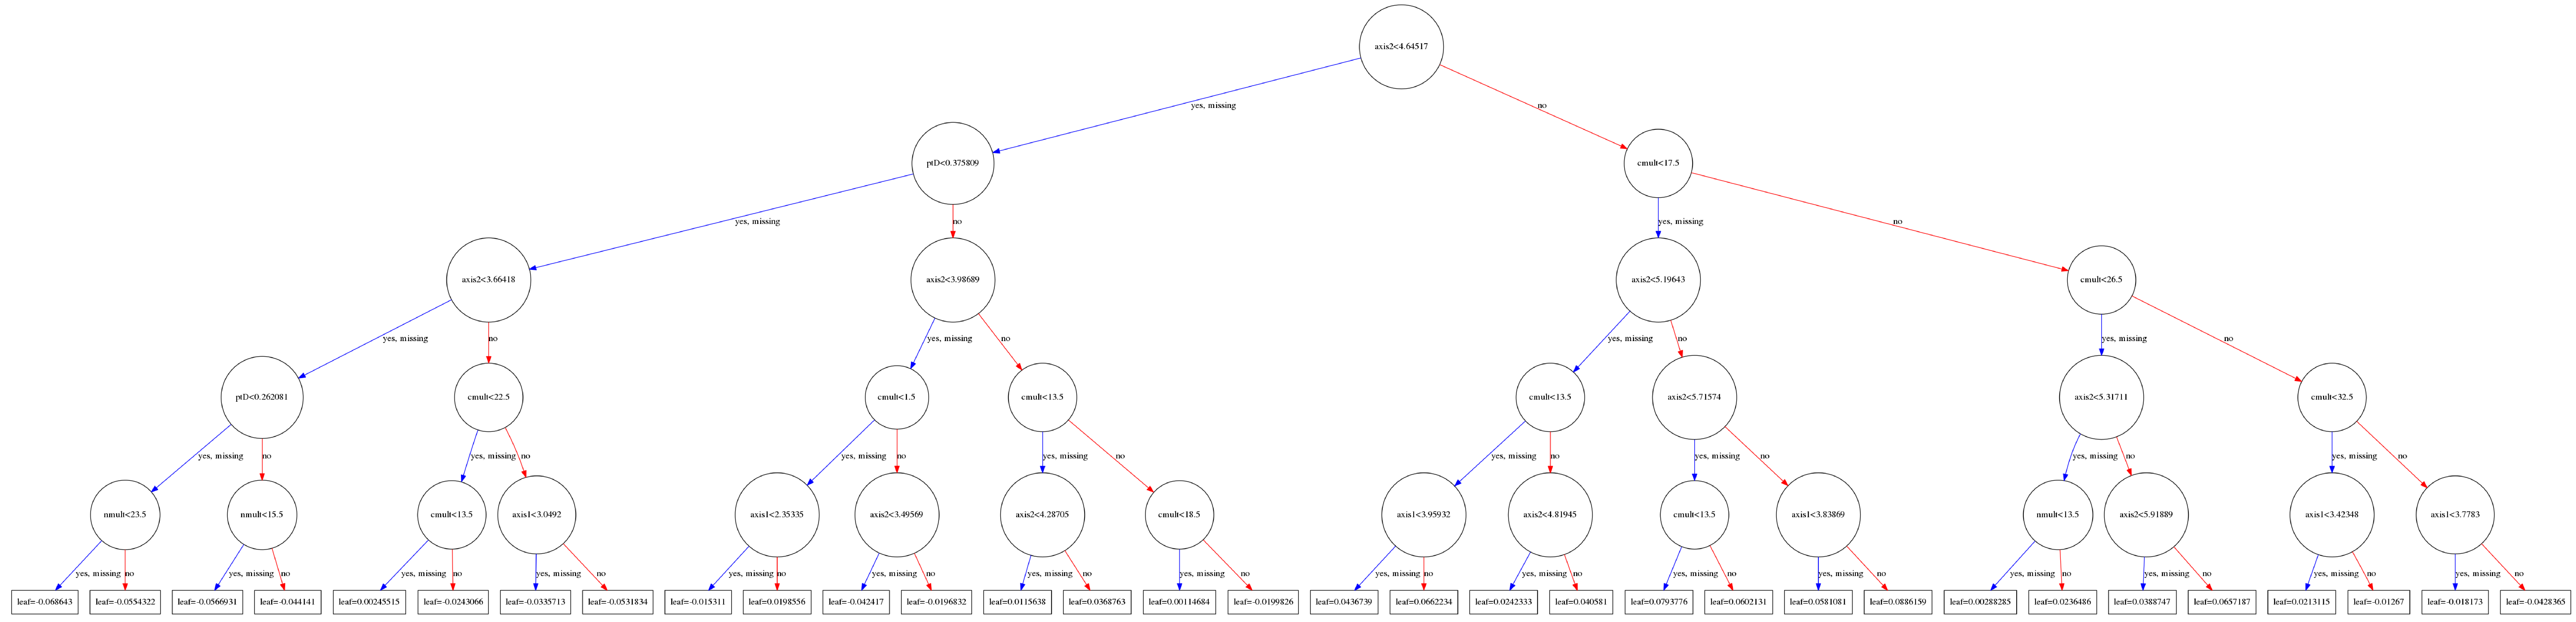

In [15]:
my_plot_tree(bst, (200, 500))

In [17]:
xgb.DMatrix?

In [6]:
!head './data/jet4np.csv'

# pdgid, nmult, cmult, axis1, axis2, ptD
1,20,24,1.94665,3.1826,0.269294
1,9,16,3.17297,4.11333,0.353626
0,8,4,2.67702,3.48177,0.40273
0,5,12,2.44806,2.80401,0.317627
1,10,9,5.34697,5.8509,0.77458
0,19,50,2.14324,2.60156,0.208653
1,12,15,2.74157,3.92447,0.376584
1,7,12,4.54732,4.57623,0.554796
1,9,15,4.94101,5.61079,0.509251


In [16]:
preds = bst.predict(dtest)

In [14]:
labels = dtest.get_label()

In [15]:
print ('error=%f' % ( sum(1 for i in range(len(preds)) if int(preds[i]>0.5)!=labels[i]) /float(len(preds))))

error=0.280068


In [15]:
bst.predict?

In [9]:
def my_plot_tree(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_tree
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_tree(booster=booster, ax=ax, **kwargs)

In [ ]:
my_plot_tree(bst, (50, 50))
plt.show()

In [16]:
xgb.train?